# Import Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import warnings
import os

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/BT4012 Project')
os.chdir('Datasets/')

Mounted at /content/drive


In [ ]:
# Import Datasets for Train, Validation and Test
train_vanilla = pd.read_csv('train_vanilla.csv')
train_undersampled = pd.read_csv('train_undersampled.csv')
train_synthetic = pd.read_csv('train_synthetic.csv')

test_df = pd.read_csv('test_data.csv')

# Split Datasets into features and target
Target column: `fraud`

## Split Vanilla Train Dataset

In [ ]:
X_train_vanilla = train_vanilla.copy().drop(columns='fraud')
Y_train_vanilla = train_vanilla['fraud']

## Split Undersampled Train Dataset

In [ ]:
X_train_undersampled = train_undersampled.copy().drop(columns='fraud')
Y_train_undersampled = train_undersampled['fraud']

## Split Synthetic Train Dataset

In [ ]:
X_train_synthetic = train_synthetic.copy().drop(columns='fraud')
Y_train_synthetic = train_synthetic['fraud']

## Splitting Test Set

In [ ]:
X_test = test_df.copy().drop(columns='fraud')
Y_test = test_df['fraud']

# ADABoost

In [ ]:
# Initialise ADABoost Classifier
ada_clf = AdaBoostClassifier()

## Cross-Validate using GridSearchCV
### Vanilla Train Set

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    # Add other parameters as needed
}

# Perform GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # You can adjust the number of splits

vanilla_grid_search = GridSearchCV(estimator=ada_clf, param_grid=param_grid, scoring='accuracy', cv=cv)
vanilla_grid_search.fit(X_train_vanilla, Y_train_vanilla)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Get best params
vanilla_best_params = vanilla_grid_search.best_params_
print("Best Parameters:", vanilla_best_params)

vanilla_best_score = vanilla_grid_search.best_score_
print(f"Best Accuracy Score: {vanilla_best_score}")

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best Accuracy Score: 0.8564516356557436


In [ ]:
# Fit model with best params
vanilla_best_ada_clf = vanilla_grid_search.best_estimator_
vanilla_best_ada_clf.fit(X_train_vanilla, Y_train_vanilla)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

### Undersampled Test Set

In [ ]:
undersampled_grid_search = GridSearchCV(estimator=ada_clf, param_grid=param_grid, scoring='accuracy', cv=cv)
undersampled_grid_search.fit(X_train_undersampled, Y_train_undersampled)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Get best params
undersampled_best_params = undersampled_grid_search.best_params_
print("Best Parameters:", undersampled_best_params)

undersampled_best_score = undersampled_grid_search.best_score_
print(f"Best Accuracy Score: {undersampled_best_score}")

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best Accuracy Score: 0.804720557661734


In [ ]:
# Fit model with best params
undersampled_best_ada_clf = undersampled_grid_search.best_estimator_
undersampled_best_ada_clf.fit(X_train_undersampled, Y_train_undersampled)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

### Synthetic Test Set

In [ ]:
synthetic_grid_search = GridSearchCV(estimator=ada_clf, param_grid=param_grid, scoring='accuracy', cv=cv)
synthetic_grid_search.fit(X_train_synthetic, Y_train_synthetic)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Get best params
synthetic_best_params = synthetic_grid_search.best_params_
print("Best Parameters:", synthetic_best_params)

synthetic_best_score = synthetic_grid_search.best_score_
print(f"Best Accuracy Score: {synthetic_best_score}")

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 200}
Best Accuracy Score: 0.8878120906489462


In [ ]:
# Fit model with best params
synthetic_best_ada_clf = synthetic_grid_search.best_estimator_
synthetic_best_ada_clf.fit(X_train_synthetic, Y_train_synthetic)

AdaBoostClassifier(n_estimators=200)

## Predict on Test set
Predict on test set based on ADABoost classifier with tuned hyperparameters determined by GridSearchCV.

In [ ]:
# Predict on test set
vanilla_y_pred = vanilla_best_ada_clf.predict(X_test)

In [ ]:
vanilla_cf = confusion_matrix(Y_test, vanilla_y_pred)
print(f"Confusion Matrix for ADABoost trained on Vanilla: \n{vanilla_cf}")

vanilla_acc = accuracy_score(Y_test, vanilla_y_pred)
print(f"Accuracy Score for ADABoost trained on Vanilla = {vanilla_acc*100:.2f}%")

vanilla_pre = precision_score(Y_test, vanilla_y_pred)
print(f"Precision Score for ADABoost trained on Vanilla = {vanilla_pre*100:.2f}%")

vanilla_rec = recall_score(Y_test, vanilla_y_pred)
print(f"Recall Score for ADABoost trained on Vanilla = {vanilla_rec*100:.2f}%")

vanilla_f1 = f1_score(Y_test, vanilla_y_pred)
print(f"F1 Score for ADABoost trained on Vanilla = {vanilla_f1*100:.2f}%")

vanilla_roc_auc = roc_auc_score(Y_test, vanilla_y_pred)
print(f"ROC AUC Score for ADABoost trained on Vanilla = {vanilla_roc_auc*100:.2f}%")

Confusion Matrix for ADABoost trained on Vanilla: 
[[636  38]
 [ 95 119]]
Accuracy Score for ADABoost trained on Vanilla = 85.02%
Precision Score for ADABoost trained on Vanilla = 75.80%
Recall Score for ADABoost trained on Vanilla = 55.61%
F1 Score for ADABoost trained on Vanilla = 64.15%
ROC AUC Score for ADABoost trained on Vanilla = 74.98%


In [ ]:
# Predict on test set
undersampled_y_pred = undersampled_best_ada_clf.predict(X_test)

In [ ]:
undersampled_cf = confusion_matrix(Y_test, undersampled_y_pred)
print(f"Confusion Matrix for ADABoost trained on Undersampled: \n{undersampled_cf}")

undersampled_acc = accuracy_score(Y_test, undersampled_y_pred)
print(f"Accuracy Score for ADABoost trained on Undersampled = {undersampled_acc*100:.2f}%")

undersampled_pre = precision_score(Y_test, undersampled_y_pred)
print(f"Precision Score for ADABoost trained on Undersampled = {undersampled_pre*100:.2f}%")

undersampled_rec = recall_score(Y_test, undersampled_y_pred)
print(f"Recall Score for ADABoost trained on Undersampled = {undersampled_rec*100:.2f}%")

undersampled_f1 = f1_score(Y_test, undersampled_y_pred)
print(f"F1 Score for ADABoost trained on Undersampled = {undersampled_f1*100:.2f}%")

undersampled_roc_auc = roc_auc_score(Y_test, undersampled_y_pred)
print(f"ROC AUC Score for ADABoost trained on Undersampled = {undersampled_roc_auc*100:.2f}%")

Confusion Matrix for ADABoost trained on Undersampled: 
[[518 156]
 [ 20 194]]
Accuracy Score for ADABoost trained on Undersampled = 80.18%
Precision Score for ADABoost trained on Undersampled = 55.43%
Recall Score for ADABoost trained on Undersampled = 90.65%
F1 Score for ADABoost trained on Undersampled = 68.79%
ROC AUC Score for ADABoost trained on Undersampled = 83.75%


In [ ]:
# Predict on test set
synthetic_y_pred = synthetic_best_ada_clf.predict(X_test)

In [ ]:
synthetic_cf = confusion_matrix(Y_test, synthetic_y_pred)
print(f"Confusion Matrix for ADABoost trained on Synthetic: \n{synthetic_cf}")

synthetic_acc = accuracy_score(Y_test, synthetic_y_pred)
print(f"Accuracy Score for ADABoost trained on Synthetic = {synthetic_acc*100:.2f}%")

synthetic_pre = precision_score(Y_test, synthetic_y_pred)
print(f"Precision Score for ADABoost trained on Synthetic = {synthetic_pre*100:.2f}%")

synthetic_rec = recall_score(Y_test, synthetic_y_pred)
print(f"Recall Score for ADABoost trained on Synthetic = {synthetic_rec*100:.2f}%")

synthetic_f1 = f1_score(Y_test, synthetic_y_pred)
print(f"F1 Score for ADABoost trained on Synthetic = {synthetic_f1*100:.2f}%")

synthetic_roc_auc = roc_auc_score(Y_test, synthetic_y_pred)
print(f"ROC AUC Score for ADABoost trained on Synthetic = {synthetic_roc_auc*100:.2f}%")

Confusion Matrix for ADABoost trained on Synthetic: 
[[591  83]
 [ 61 153]]
Accuracy Score for ADABoost trained on Synthetic = 83.78%
Precision Score for ADABoost trained on Synthetic = 64.83%
Recall Score for ADABoost trained on Synthetic = 71.50%
F1 Score for ADABoost trained on Synthetic = 68.00%
ROC AUC Score for ADABoost trained on Synthetic = 79.59%


## Plots to show Performance

### Precision-Recall Curve

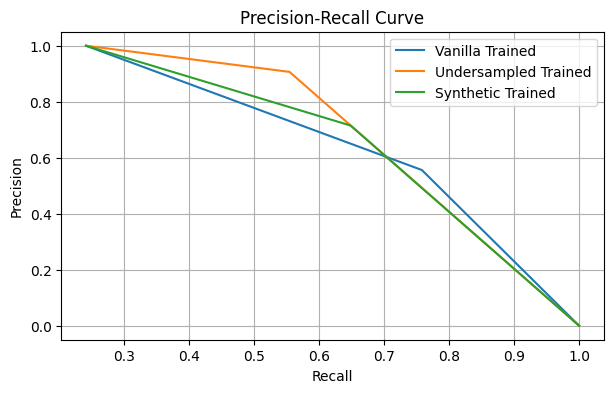

In [ ]:
vanilla_prerec_curve = precision_recall_curve(Y_test, vanilla_y_pred)
undersampled_prerec_curve = precision_recall_curve(Y_test, undersampled_y_pred)
synthetic_prerec_curve = precision_recall_curve(Y_test, synthetic_y_pred)

plt.figure(figsize=(7,4))
plt.plot(vanilla_prerec_curve[0], vanilla_prerec_curve[1], label='Vanilla Trained')
plt.plot(undersampled_prerec_curve[0], undersampled_prerec_curve[1], label='Undersampled Trained')
plt.plot(synthetic_prerec_curve[0], synthetic_prerec_curve[1], label='Synthetic Trained')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

### ROC AUC

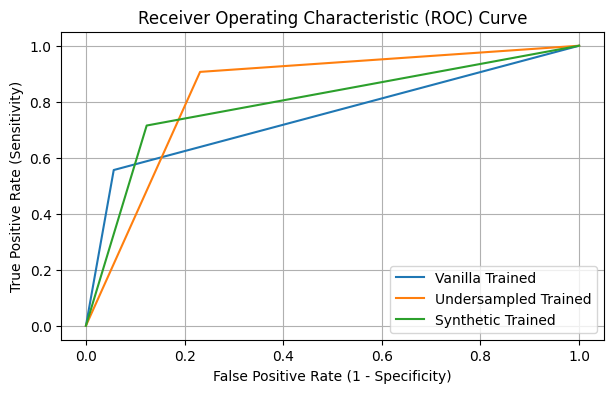

In [ ]:
vanilla_roc_curve = roc_curve(Y_test, vanilla_y_pred)
undersampled_roc_curve = roc_curve(Y_test, undersampled_y_pred)
synthetic_roc_curve = roc_curve(Y_test, synthetic_y_pred)

plt.figure(figsize=(7,4))
plt.plot(vanilla_roc_curve[0], vanilla_roc_curve[1], label='Vanilla Trained')
plt.plot(undersampled_roc_curve[0], undersampled_roc_curve[1], label='Undersampled Trained')
plt.plot(synthetic_roc_curve[0], synthetic_roc_curve[1], label='Synthetic Trained')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()